---
title: "Quarto Basics"
format: 
  html:
    code-fold: true
jupyter: python3
---

This example shows how to use groupby to create grouped data that can be plotted with bar and pie charts

First we import pandas as ussual, read the data, and do some quick checks

In [16]:
import pandas as pd
from IPython.display import display

basketball_stats=pd.read_csv('stats2016.csv', sep=';')
basketball_stats.shape

#display(basketball_stats.head())
basketball_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3,Steven Adams,C,22,OKC,52,52,24.9,2.8,4.8,...,0.607,2.5,3.8,6.3,0.7,0.4,1.2,1.0,2.8,7.2
1,5,Alexis Ajinca,C,27,NOP,41,6,12.3,2.0,4.0,...,0.821,1.1,3.0,4.1,0.4,0.3,0.5,0.5,2.2,4.6
2,6,Cole Aldrich,C,27,LAC,31,2,11.5,2.1,3.9,...,0.661,1.1,2.7,3.8,0.9,0.6,0.7,0.9,2.2,5.4
3,13,Chris Andersen,C,37,MIA,7,1,5.1,0.6,1.4,...,0.750,0.4,0.9,1.3,0.4,0.1,0.4,0.3,0.6,1.9
4,21,Joel Anthony,C,33,DET,13,0,4.0,0.2,0.4,...,0.833,0.5,0.6,1.2,0.1,0.2,0.3,0.1,0.6,0.7


## Sort and clean
In this step we sort by MP and then only take the top 100 in minutes played. We do this to avoid looking at a lot of players who didn't get much playing time

In [17]:
basketball_stats=basketball_stats.sort_values('MP', ascending=False)
basketball_stats=basketball_stats[0:100]
print(basketball_stats.shape)
display(basketball_stats.head())

(100, 30)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
387,69,Jimmy Butler,SG,26,CHI,48,48,37.9,7.4,16.2,...,0.827,1.1,4.1,5.2,4.3,1.7,0.6,2.0,1.9,22.4
411,167,James Harden,SG,26,HOU,55,55,37.3,8.2,19.1,...,0.869,0.8,5.5,6.3,7.0,1.6,0.7,4.5,2.7,28.0
388,73,Kentavious Caldwell-Pope,SG,22,DET,50,50,36.9,5.3,12.7,...,0.824,0.9,2.9,3.8,1.8,1.5,0.3,1.5,2.3,14.6
239,260,Kyle Lowry,PG,29,TOR,52,52,36.8,6.6,15.6,...,0.857,0.7,4.2,4.9,6.3,2.2,0.5,2.9,2.7,21.0
425,238,Brandon Knight,SG,24,PHO,42,41,36.3,7.4,17.3,...,0.847,0.6,3.1,3.7,5.1,1.3,0.3,3.5,2.4,19.7


## Groupby

Now we use our groupby function to get players grouped by position. 

In [18]:
# group by position
groupby_stats=basketball_stats.groupby('Pos')
print (type(groupby_stats))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


## Aggregate
We now have a 'DataFrameGroupBy' object, to make it useful for plotting we have to "aggregate" the groups (ie with mean(), max(), min(), etc.)

In [19]:
# aggregate using the mean
grouped_stats_mean=groupby_stats.mean()
print (type(grouped_stats_mean))
display(grouped_stats_mean)

<class 'pandas.core.frame.DataFrame'>


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,230.000000,26.733333,48.800000,48.200000,32.186667,6.353333,12.413333,0.526667,0.186667,0.573333,...,0.691067,2.893333,7.246667,10.146667,2.106667,0.860000,1.480000,2.060000,2.720000,16.086667
PF,186.000000,26.733333,48.400000,45.000000,32.613333,6.446667,13.540000,0.477867,0.993333,2.706667,...,0.759400,1.866667,6.260000,8.133333,2.540000,1.066667,1.013333,1.966667,2.386667,17.120000
PG,275.608696,26.347826,44.217391,43.304348,32.791304,6.186957,14.386957,0.427174,1.473913,4.104348,...,0.797739,0.734783,3.521739,4.243478,6.830435,1.504348,0.326087,2.843478,2.213043,17.208696
SF,145.954545,27.181818,46.363636,44.045455,32.622727,5.518182,12.277273,0.447318,1.463636,4.072727,...,0.777409,1.086364,4.540909,5.622727,2.600000,1.145455,0.445455,1.731818,2.168182,15.422727
SG,204.840000,26.120000,48.720000,46.520000,33.484000,5.972000,13.672000,0.435160,1.700000,4.708000,...,0.810440,0.668000,3.092000,3.748000,3.344000,1.116000,0.380000,2.072000,2.212000,16.672000


## Barchart

The above steps give as a ```dataframe``` that holds the mean stats of each basketball position.  Now we can easily generate plots to visualize difference between the cateories (the positions).   Below we use a bar plot to look at average points per position. 

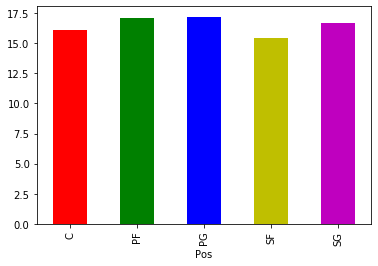

In [25]:
%matplotlib inline
grouped_stats_mean['PTS'].plot(kind='bar', color=["r","g","b","y","m"])


We can also, very easily change to visualizing using a pie chart

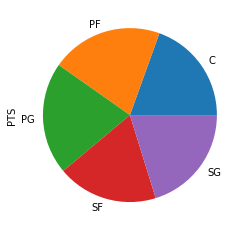

In [26]:
#grouped_stats.mean['PTS'].plot(kind='pie')
grouped_stats_mean['PTS'].plot(kind='pie')